<h3>NLP Tutorial: Text Classification Using Spacy Word Embeddings</h3>

#### Problem Statement

- Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

- Fake news spreads faster than real news and creates problems and fear among groups and in society.

- We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is **Real or Fake Message**.

- We will use **glove embeddings** from spacy which is trained on massive wikipedia dataset to pre-process and text vectorization and apply different classification algorithms.

#### Dataset

Credits: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset


- This data consists of two columns.
        - Text
        - label
- Text is the statements or messages regarding a particular event/situation.

- label feature tells whether the given text is Fake or Real.

- As there are only 2 classes, this problem comes under the **Binary Classification.**

In [2]:
import pandas as pd

df = pd.read_csv("Fake_Real_Data.csv")

#print the shape of dataframe
print(df.shape)

#print top 5 rows
df.head(5)

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [3]:
df['label'].value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

From the above, we can see that almost the labels(classes) occured equal number of times and balanced. There is no problem of class imbalance and hence no need to apply any balancing techniques like undersampling, oversampling etc.


In [4]:
df['label_num'] = df['label'].map({'Fake' : 0, 'Real': 1})

#check the results with top 5 rows
df.head(5)

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


<b>Get spacy word vectors

In [5]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [25]:
doc = nlp("Top Trump Surrogate BRUTALLY Stabs Him")

In [26]:
doc.vector.shape

(300,)

In [6]:
df['vector'] = df['Text'].apply(lambda text: nlp(text).vector)  

In [7]:
df.head()

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.103623025, 0.17802684, -0.11873861, -0.034..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-0.0063406364, 0.16712041, -0.06661373, 0.017..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-0.122753024, 0.17192385, -0.024732638, -0.06..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-0.027337318, 0.12501417, -0.0073965387, -0.0..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.032708026, 0.093958504, -0.03287002, -0.00..."


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label_num,
    test_size=0.2,
    random_state=2022
)

In [20]:
X_train[:2]

array([array([-2.37034578e-02,  1.48199528e-01, -5.90629913e-02, -3.08816023e-02,
               7.27375224e-02, -3.08532882e-02, -3.06985099e-02, -1.34581909e-01,
              -2.89440658e-02,  2.11217093e+00, -2.11404130e-01, -1.30848298e-02,
               9.76289958e-02, -8.72511789e-02, -1.27175421e-01, -7.87014738e-02,
              -4.45573106e-02,  8.96639585e-01, -7.74146467e-02, -1.98509209e-02,
              -4.66989167e-03,  3.00393123e-02, -5.44604585e-02, -3.01919542e-02,
               2.35033669e-02,  4.78319898e-02, -1.07414149e-01, -4.99117828e-04,
               6.58109086e-03, -7.65082892e-03,  2.21302323e-02,  3.81453149e-02,
               2.45294645e-02,  8.50784853e-02,  4.57540490e-02, -2.83517223e-02,
              -2.62076780e-02,  9.25419573e-03, -4.42117751e-02, -1.07683197e-01,
               9.35755111e-03,  6.35481179e-02,  5.63387387e-02, -6.61794245e-02,
               1.34266177e-02,  1.39213279e-02, -8.35610852e-02, -3.96741964e-02,
               2

In [21]:
X_train.shape

(7920,)

Here X_train is numpy array and each of elements also a numpy array, so we have to convert it into 2D numpy array using stack

In [9]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [23]:
X_train_2d[:2]

array([[-2.37034578e-02,  1.48199528e-01, -5.90629913e-02,
        -3.08816023e-02,  7.27375224e-02, -3.08532882e-02,
        -3.06985099e-02, -1.34581909e-01, -2.89440658e-02,
         2.11217093e+00, -2.11404130e-01, -1.30848298e-02,
         9.76289958e-02, -8.72511789e-02, -1.27175421e-01,
        -7.87014738e-02, -4.45573106e-02,  8.96639585e-01,
        -7.74146467e-02, -1.98509209e-02, -4.66989167e-03,
         3.00393123e-02, -5.44604585e-02, -3.01919542e-02,
         2.35033669e-02,  4.78319898e-02, -1.07414149e-01,
        -4.99117828e-04,  6.58109086e-03, -7.65082892e-03,
         2.21302323e-02,  3.81453149e-02,  2.45294645e-02,
         8.50784853e-02,  4.57540490e-02, -2.83517223e-02,
        -2.62076780e-02,  9.25419573e-03, -4.42117751e-02,
        -1.07683197e-01,  9.35755111e-03,  6.35481179e-02,
         5.63387387e-02, -6.61794245e-02,  1.34266177e-02,
         1.39213279e-02, -8.35610852e-02, -3.96741964e-02,
         2.82106642e-02,  3.59523483e-02,  2.15092339e-0

In [24]:
X_train_2d.shape

(7920, 300)

MultinomialNB doesn't accept negative values so we have to use scaling

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [12]:
y_pred = clf.predict(scaled_test_embed)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1024
           1       0.95      0.95      0.95       956

    accuracy                           0.95      1980
   macro avg       0.95      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980



In [13]:
from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1024
           1       0.97      0.99      0.98       956

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



Text(95.72222222222221, 0.5, 'Truth')

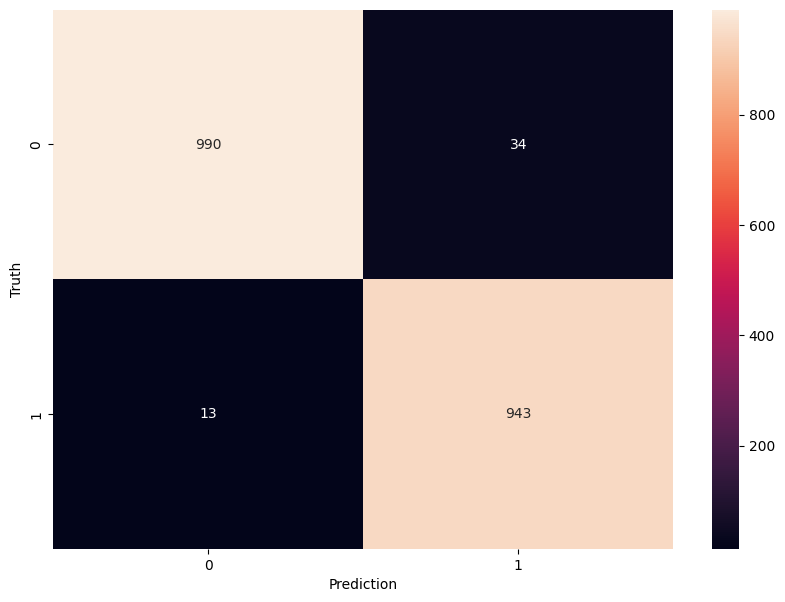

In [16]:
 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

#### Key Takeaways

1. KNN model which didn't perform well in the vectorization techniques like Bag of words, and TF-IDF due to very **high dimensional vector space**, performed really well with glove vectors due to only **300-dimensional** vectors and very good embeddings(similar and related words have almost similar embeddings) for the given text data.

2. MultinomialNB model performed decently well but did not come into the top list because in the 300-dimensional vectors we also have the negative values present. The Naive Bayes model does not fit the data if there are **negative values**. So, to overcome this shortcoming, we have used the **Min-Max scaler** to bring down all the values between 0 to 1. In this process, there will be a possibility of variance and information loss among the data. But anyhow we got a decent recall and f1 scores.